In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#%matplotlib notebook
#import matplotlib.pylab as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd
import multiprocessing
from joblib import Parallel, delayed
num_cores = multiprocessing.cpu_count()
if num_cores == 32:
    num_cores = 24  # lsst-dev - don't use all the cores, man.
elif num_cores == 8:
    num_cores = 3
elif num_cores == 4:
    num_cores = 2
print num_cores

import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

pd.options.display.max_columns = 9999
pd.set_option('display.width', 9999)

import warnings
warnings.filterwarnings('ignore')

import diffimTests as dit

3


In [2]:
# Set up console so we can reattach via terminal ipython later. See:
# https://stackoverflow.com/questions/19479645/using-ipython-console-along-side-ipython-notebook

%qtconsole

# Then do `ipython console --existing` in a terminal to connect and have access to same data!
# But note, do not do CTRL-D in that terminal or it will kill the kernel!

## After adding these to `diffimTests.psf.makePsf` and `diffimTests.makeFakeImages`...

{'ZOGY': {'FP': 2, 'FN': 460, 'TP': 40}, 'ALstack': {'FP': 2, 'FN': 461, 'TP': 39}, 'SZOGY': {'FP': 3, 'FN': 461, 'TP': 39}, 'ALstack_decorr': {'FP': 2, 'FN': 461, 'TP': 39}}
A&L(dec): (0.91732198, 17.496792, -60.915623, 100.53636)
ZOGY: (0.0066282100631979909, 1.0014489811209062, -4.8687719749584559, 6.3430344879101215)
A&L(dec) - ZOGY: (-0.0055073887749200095, 0.027376972332113718, -0.21180614431647671, 0.3428886276953288)


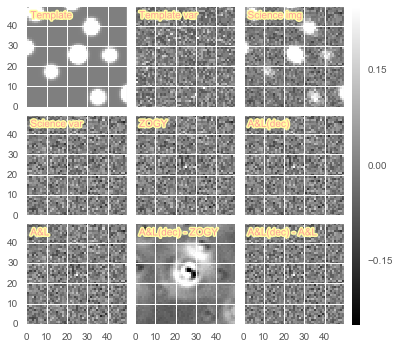

In [3]:
reload(dit)
testObj = dit.diffimTests.DiffimTest(n_sources=500, sourceFluxRange=(2000, 20000), 
                         varFlux2=np.linspace(200, 2000, 50),
                         #varFlux2=np.repeat(500., 50),
                         templateNoNoise=True, skyLimited=True,
                         avoidAllOverlaps=15.)

res = testObj.runTest(returnSources=True)
src = res['sources']
del res['sources']
print res

tmp = dit.catalogToDF(testObj.getCentroidsCatalog(transientsOnly=False))
#dit.sizeme(tmp.tail())
testObj.doPlot(centroidCoord=[tmp.centroid_y.values[300], tmp.centroid_x.values[300]]);

{'ZOGY': {'FP': 2, 'FN': 460, 'TP': 40}, 'ALstack': {'FP': 2, 'FN': 461, 'TP': 39}, 'SZOGY': {'FP': 3, 'FN': 461, 'TP': 39}, 'ALstack_decorr': {'FP': 2, 'FN': 461, 'TP': 39}}


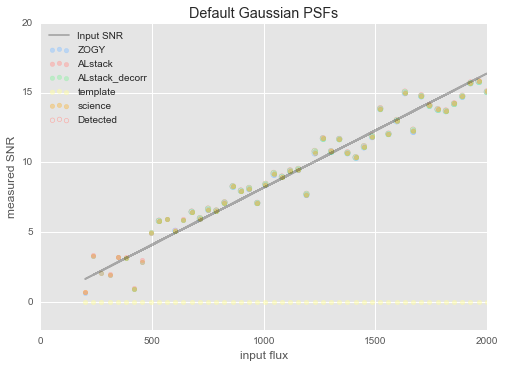

In [4]:
testObj.doPlotWithDetectionsHighlighted(transientsOnly=True, divideByInput=False, addPresub=True)
plt.xlim(0, 2000)
plt.ylim(-2, 20)
plt.title('Default Gaussian PSFs')

{'ZOGY': {'FP': 3, 'FN': 466, 'TP': 34}, 'ALstack': {'FP': 2, 'FN': 466, 'TP': 34}, 'SZOGY': {'FP': 6, 'FN': 468, 'TP': 32}, 'ALstack_decorr': {'FP': 2, 'FN': 466, 'TP': 34}}
A&L(dec): (1.0566187, 17.670139, -60.681126, 79.550629)
ZOGY: (0.0083738127507250494, 1.0018201361733963, -4.4786960218941623, 5.2502934395745529)
A&L(dec) - ZOGY: (-0.0055979471127054533, 0.031776287171215271, -0.2158181021907164, 0.29705824479606102)


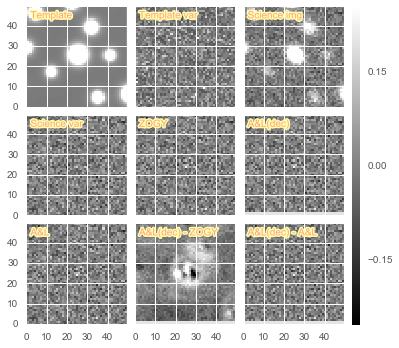

In [5]:
reload(dit)
testObj2 = dit.diffimTests.DiffimTest(n_sources=500, sourceFluxRange=(2000, 20000), 
                         varFlux2=np.linspace(200, 2000, 50),
                         #varFlux2=np.repeat(500., 50),
                         templateNoNoise=True, skyLimited=True,
                         avoidAllOverlaps=15., psfType='doubleGaussian')

res2 = testObj2.runTest(returnSources=True)
src2 = res2['sources']
del res2['sources']
print res2

testObj2.doPlot(centroidCoord=[tmp.centroid_y.values[300], tmp.centroid_x.values[300]]);

{'ZOGY': {'FP': 3, 'FN': 466, 'TP': 34}, 'ALstack': {'FP': 2, 'FN': 466, 'TP': 34}, 'SZOGY': {'FP': 6, 'FN': 468, 'TP': 32}, 'ALstack_decorr': {'FP': 2, 'FN': 466, 'TP': 34}}


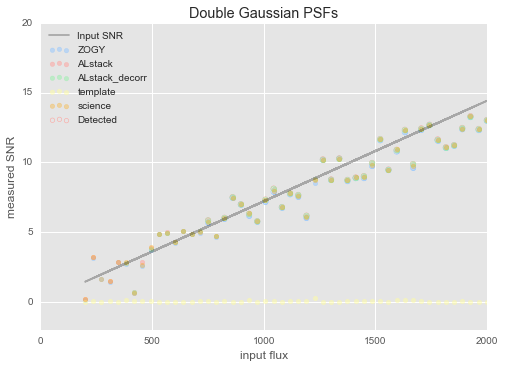

In [6]:
testObj2.doPlotWithDetectionsHighlighted(transientsOnly=True, divideByInput=False, addPresub=True)
plt.xlim(0, 2000)
plt.ylim(-2, 20)
plt.title('Double Gaussian PSFs')

{'ZOGY': {'FP': 4, 'FN': 465, 'TP': 35}, 'ALstack': {'FP': 3, 'FN': 465, 'TP': 35}, 'SZOGY': {'FP': 4, 'FN': 465, 'TP': 35}, 'ALstack_decorr': {'FP': 3, 'FN': 465, 'TP': 35}}
A&L(dec): (0.88875777, 17.555168, -58.043015, 69.942375)
ZOGY: (0.0081933261892621293, 1.0020766450930154, -4.9269282769130829, 5.8823377386525157)
A&L(dec) - ZOGY: (0.0010620277019390148, 0.027406494847070841, -0.21242402932991489, 0.24438622145054523)


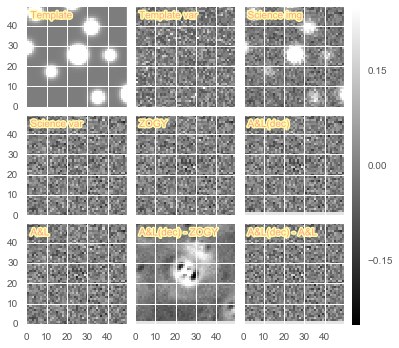

In [7]:
reload(dit)
testObj3 = dit.diffimTests.DiffimTest(n_sources=500, sourceFluxRange=(2000, 20000), 
                         varFlux2=np.linspace(200, 2000, 50),
                         #varFlux2=np.repeat(500., 50),
                         templateNoNoise=True, skyLimited=True,
                         avoidAllOverlaps=15., psfType='moffat')

res3 = testObj3.runTest(returnSources=True)
src3 = res3['sources']
del res3['sources']
print res3

testObj3.doPlot(centroidCoord=[tmp.centroid_y.values[300], tmp.centroid_x.values[300]]);

{'ZOGY': {'FP': 4, 'FN': 465, 'TP': 35}, 'ALstack': {'FP': 3, 'FN': 465, 'TP': 35}, 'SZOGY': {'FP': 4, 'FN': 465, 'TP': 35}, 'ALstack_decorr': {'FP': 3, 'FN': 465, 'TP': 35}}


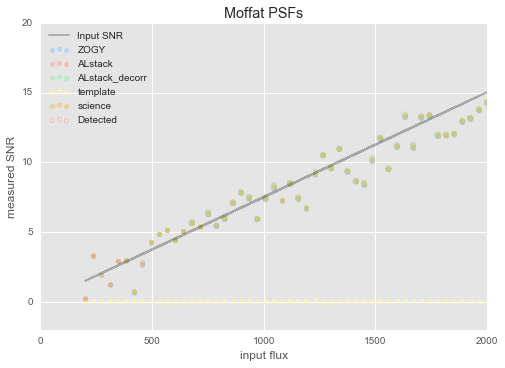

In [8]:
testObj3.doPlotWithDetectionsHighlighted(transientsOnly=True, divideByInput=False, addPresub=True)
plt.xlim(0, 2000)
plt.ylim(-2, 20)
plt.title('Moffat PSFs')

Kolmogorov works now, but is slow and there's still an issue with the A&L(dec) - ZOGY image.
Seems to be because of a 0.5-pixel offset in the psf. (UPDATE: Fixed!)

In [9]:
reload(dit)
testObj4 = dit.diffimTests.DiffimTest(n_sources=500, sourceFluxRange=(2000, 20000), 
                         varFlux2=np.linspace(200, 2000, 50),
                         #varFlux2=np.repeat(500., 50),
                         templateNoNoise=True, skyLimited=True,
                         avoidAllOverlaps=15., psfType='kolmogorov')

res4 = testObj4.runTest(returnSources=True)
src4 = res4['sources']
del res4['sources']
print res4

{'ZOGY': {'FP': 11, 'FN': 473, 'TP': 27}, 'ALstack': {'FP': 11, 'FN': 474, 'TP': 26}, 'SZOGY': {'FP': 13, 'FN': 474, 'TP': 26}, 'ALstack_decorr': {'FP': 11, 'FN': 474, 'TP': 26}}


A&L(dec): (1.0325626, 17.746454, -57.41634, 78.258499)
ZOGY: (0.0074970444670445857, 1.0027735397180231, -4.9669731749746546, 5.7627646833369077)
A&L(dec) - ZOGY: (-0.0013071093952798944, 0.035724202403660393, -0.28008561041255042, 0.36981536766473511)


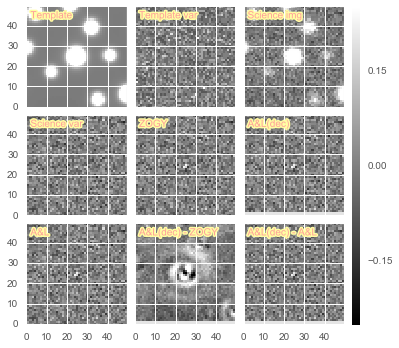

In [10]:
tmp = dit.catalogToDF(testObj.getCentroidsCatalog(transientsOnly=False))
testObj4.doPlot(centroidCoord=[tmp.centroid_y.values[300], tmp.centroid_x.values[300]]);
#testObj4.doPlot();

This difference (below) is due to an issue probably with an offset in the PSFs. (NOTE: the offset is fixed, but there is still a small decrease in SNR for high-SNR sources. Likely due to the large "halo"?

{'ZOGY': {'FP': 11, 'FN': 473, 'TP': 27}, 'ALstack': {'FP': 11, 'FN': 474, 'TP': 26}, 'SZOGY': {'FP': 13, 'FN': 474, 'TP': 26}, 'ALstack_decorr': {'FP': 11, 'FN': 474, 'TP': 26}}


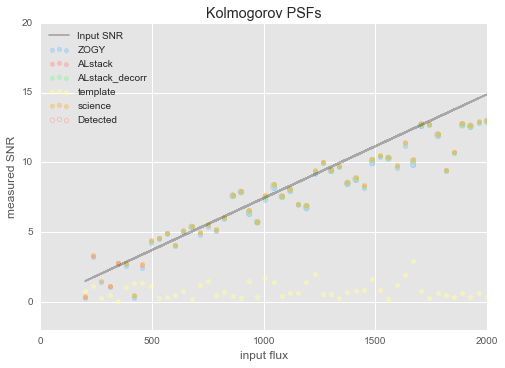

In [11]:
testObj4.doPlotWithDetectionsHighlighted(transientsOnly=True, divideByInput=False, addPresub=True)
plt.xlim(0, 2000)
plt.ylim(-2, 20)
plt.title('Kolmogorov PSFs')

# Now for "real" psfs from real images.

Ran this cell once, don't run it again. Results are cached in `psfLib` directory.

In [12]:
import diffimTests as dit
import glob, os

afwData = os.getenv('AFWDATA_DIR')
drpData = os.getenv('HOME') + '/DATA/'

#fnames = glob.glob('./psfLib/*.fits')
#fnames = [fn.replace('_psf', '') for fn in fnames]
filenames = glob.glob(afwData + '/CFHT/D4/*.fits')
# PsfEx doesn't seem to work well on the imsim simulated images.
filenames.extend(glob.glob(afwData + '/ImSim/postISR/v85751839-fr/s1/R23/S11/*.fits'))
filenames.extend(glob.glob(drpData + '/validation_data_decam/data/*/calexp/calexp*.fits'))
filenames.extend(glob.glob(drpData + './validation_data_cfht/data/calexp/06AL01/D3/2006-*/r/calexp*.fits'))

psfs = {}
for filename in filenames:
    #print filename
    try:
        psf, source = dit.psf.loadPsf(filename, asArray=False)
        if psf is not None:
            print filename, dit.afw.afwPsfToShape(psf)
            psfs[filename] = psf
    except Exception as e:
        pass
        #print e
        
print len(psfs)

/Users/dreiss/lsstsw/stack/DarwinX86/afwdata/2.2016.10+7/CFHT/D4/cal-53535-i-797722_1.fits (ixx=2.94816469033, iyy=4.45738762979, ixy=-0.92068890118)
/Users/dreiss/lsstsw/stack/DarwinX86/afwdata/2.2016.10+7/CFHT/D4/cal-53535-i-797722_1_tmpl.fits (ixx=3.64391908276, iyy=4.02471747415, ixy=-0.18133585555)
/Users/dreiss/lsstsw/stack/DarwinX86/afwdata/2.2016.10+7/CFHT/D4/cal-53535-i-797722_2.fits (ixx=2.55937027591, iyy=3.93038772842, ixy=-0.502375296895)
/Users/dreiss/lsstsw/stack/DarwinX86/afwdata/2.2016.10+7/CFHT/D4/cal-53535-i-797722_2_tmpl.fits (ixx=3.39782342322, iyy=3.68717056065, ixy=-0.0742932363751)
/Users/dreiss/lsstsw/stack/DarwinX86/afwdata/2.2016.10+7/CFHT/D4/cal-53535-i-797722_3.fits (ixx=2.28475730023, iyy=3.45907719925, ixy=-0.183215104756)
/Users/dreiss/lsstsw/stack/DarwinX86/afwdata/2.2016.10+7/CFHT/D4/cal-53535-i-797722_3_tmpl.fits (ixx=3.28642181602, iyy=3.48807236631, ixy=0.0248749106604)
/Users/dreiss/lsstsw/stack/DarwinX86/afwdata/2.2016.10+7/CFHT/D4/cal-53535-i-797

58


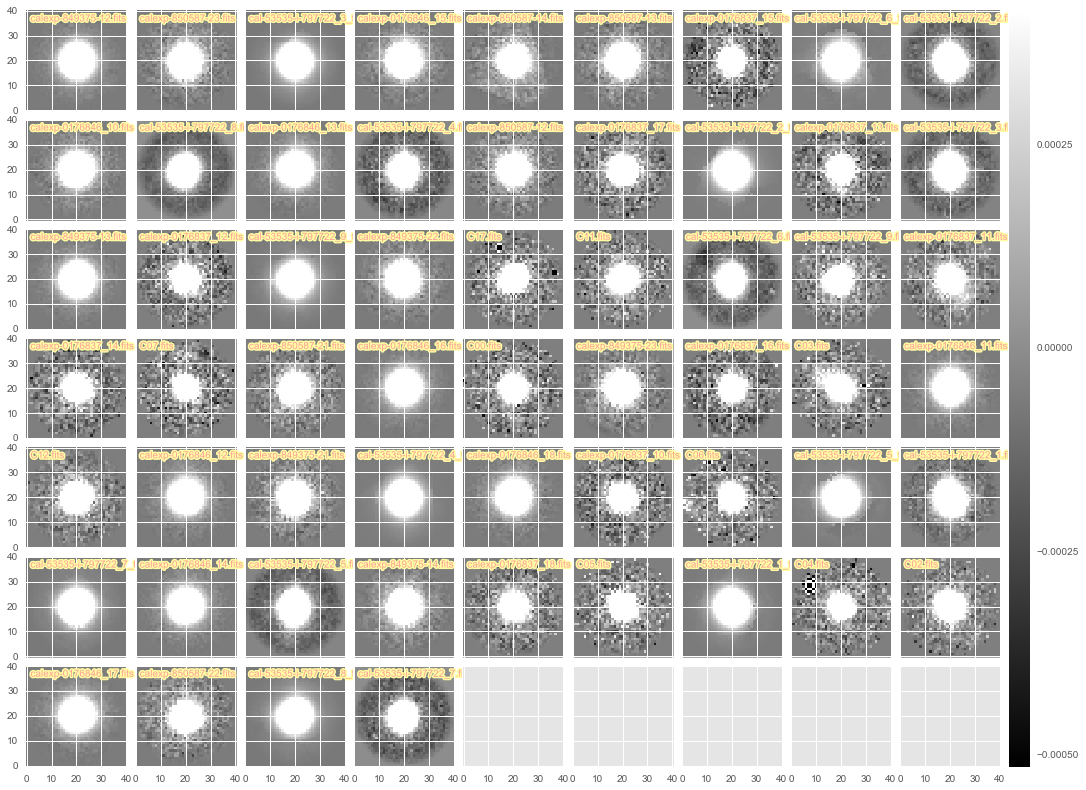

In [13]:
psftmp = [dit.afw.afwPsfToArray(psfs[key]) for key in psfs]
psftitles = [os.path.basename(key) for key in psfs]
psftitles = [t for i,t in enumerate(psftitles) if psftmp[i] is not None]
psftmp = [p for p in psftmp if p is not None]
print len(psftmp)
#print psftitles
dit.plotImageGrid(psftmp, titles=psftitles)

## OK now let's figure out how to make the fake image generator use the real PSFS.

Still needs work, I think there's a 1-pixel offset.

Also, need to be able to pass different PSFs for template and science (DONE!)

Question - how and whether to use spatial variation.

<class 'lsst.afw.detection.detectionLib.Psf'>
True
<type 'numpy.ndarray'>
True
(ixx=3.27248563399, iyy=3.55102064854, ixy=0.0804140879974) 3.41175314126
(ixx=2.16446894133, iyy=3.13680298165, ixy=-0.0105360601912) 2.65063596149
(19.993330266912157, 19.91409574637472)
(19.912792067136213, 19.745184409706241)
(19.993330266912157, 19.91409574637472)
(19.993330799489648, 20.360915194700503)
(20.440200781363515, 19.914094990499844)


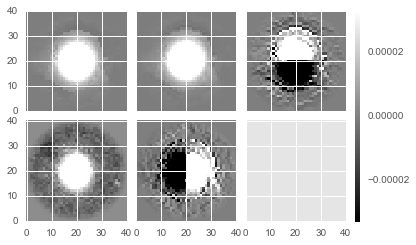

In [26]:
filename = '/Users/dreiss/lsstsw/stack/DarwinX86/afwdata/2.2016.10+7/CFHT/D4/cal-53535-i-797722_6_tmpl.fits'
psf, source = dit.psf.loadPsf(filename, asArray=False)
print type(psf)
from lsst.afw.detection import Psf
print isinstance(psf, Psf)
psfImg = dit.afw.afwPsfToArray(psf)
psfImg2 = dit.afw.afwPsfToArray(psf, centroid=[0.0, 0.45])
psfImg3 = dit.afw.afwPsfToArray(psf, centroid=[0.45, 0.0])
print type(psfImg)
print isinstance(psfImg, np.ndarray)

filename2 = '/Users/dreiss/lsstsw/stack/DarwinX86/afwdata/2.2016.10+7/CFHT/D4/cal-53535-i-797722_6.fits'
psf2, source = dit.psf.loadPsf(filename2, asArray=False)
psf2Img = dit.afw.afwPsfToArray(psf2)

#psfImg2 = dit.afw.afwPsfToArray(psf2, centroid=[0.0, 0.45])
#psfImg3 = dit.afw.afwPsfToArray(psf2, centroid=[0.45, 0.0])

sh = dit.afw.afwPsfToShape(psf)
print sh, (sh.getIxx() + sh.getIyy()) / 2.
sh = dit.afw.afwPsfToShape(psf2)
print sh, (sh.getIxx() + sh.getIyy()) / 2.

print dit.psf.computeMoments(dit.afw.afwPsfToArray(psf))
print dit.psf.computeMoments(dit.afw.afwPsfToArray(psf2))

print dit.psf.computeMoments(psfImg)
print dit.psf.computeMoments(psfImg2)
print dit.psf.computeMoments(psfImg3)

dit.plotImageGrid((psfImg, psfImg2, psfImg2-psfImg, psf2Img, psfImg3-psfImg))

In [27]:
tmp = dit.psf.makePsf(psfType=psf)
print dit.psf.computeMoments(tmp)

tmp = dit.psf.makePsf(psfType=psf, offset=[0.5, 0.5])
print dit.psf.computeMoments(tmp)

tmp = dit.psf.makePsf(psfType='gaussian')
print dit.psf.computeMoments(tmp)

tmp = dit.psf.makePsf(psfType='gaussian', offset=[0.5, 0.5])
print dit.psf.computeMoments(tmp)

tmp = dit.psf.makePsf(psfType='kolmogorov')
print dit.psf.computeMoments(tmp)

tmp = dit.psf.makePsf(psfType='kolmogorov', offset=[0.5, 0.5])
print dit.psf.computeMoments(tmp)

(20.99333026691216, 20.914095746374716)
(21.493329603358099, 21.414095673456785)
(21.0, 21.0)
(21.500000000000004, 21.5)
(21.0, 21.0)
(21.49838368120265, 21.49838368120265)


In [4]:
filename = '/Users/dreiss/lsstsw/stack/DarwinX86/afwdata/2.2016.10+7/CFHT/D4/cal-53535-i-797722_6_tmpl.fits'
psf, source = dit.psf.loadPsf(filename, asArray=False)
filename2 = '/Users/dreiss/lsstsw/stack/DarwinX86/afwdata/2.2016.10+7/CFHT/D4/cal-53535-i-797722_6.fits'
psf2, source = dit.psf.loadPsf(filename2, asArray=False)

`psf` is narrower than `psf2`, so let's just use it for the template here...

{'ZOGY': {'FP': 2, 'FN': 461, 'TP': 39}, 'ALstack': {'FP': 4, 'FN': 463, 'TP': 37}, 'SZOGY': {'FP': 1, 'FN': 461, 'TP': 39}, 'ALstack_decorr': {'FP': 3, 'FN': 462, 'TP': 38}}
A&L(dec): (0.24029225, 17.593918, -57.004486, 57.79047)
ZOGY: (0.058185563056956137, 0.9791250119441165, -5.1628690510057034, 9.0373707366176372)
A&L(dec) - ZOGY: (-0.038762607617294706, 1.5607581612826364, -5.3315089469512218, 5.6411645883935604)


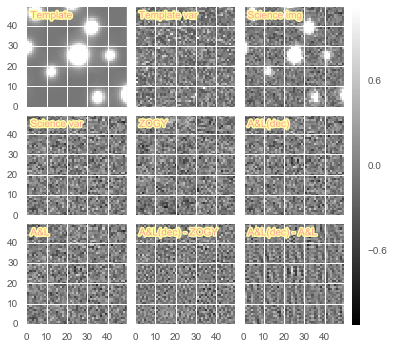

In [6]:
reload(dit)
testObj5 = dit.diffimTests.DiffimTest(n_sources=500, sourceFluxRange=(2000, 20000), 
                         varFlux2=np.linspace(200, 2000, 50), #offset=[0.05, 0.],
                         #varFlux2=np.repeat(500., 50),
                         templateNoNoise=True, skyLimited=True,
                         avoidAllOverlaps=15., psfType=[psf, psf2])

res5 = testObj5.runTest(returnSources=True)
src5 = res5['sources']
del res5['sources']
print res5

tmp = dit.catalogToDF(testObj5.getCentroidsCatalog(transientsOnly=False))

testObj5.doPlot(centroidCoord=[tmp.centroid_y.values[300], tmp.centroid_x.values[300]]);

{'ZOGY': {'FP': 2, 'FN': 461, 'TP': 39}, 'ALstack': {'FP': 4, 'FN': 463, 'TP': 37}, 'SZOGY': {'FP': 1, 'FN': 461, 'TP': 39}, 'ALstack_decorr': {'FP': 3, 'FN': 462, 'TP': 38}}


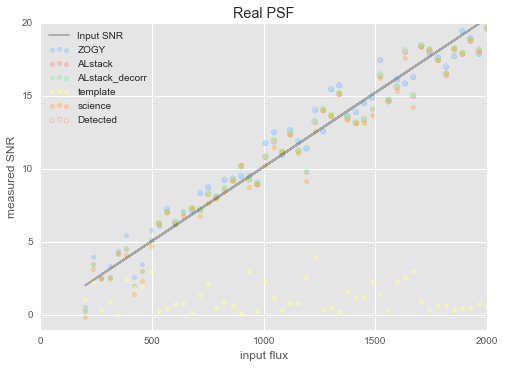

In [7]:
tmp5 = testObj5.doPlotWithDetectionsHighlighted(transientsOnly=True, divideByInput=False, addPresub=True)
plt.xlim(0, 2000)
plt.ylim(-1., 20)
plt.title('Real PSF');

Why are the SNRs for template below zero? Seems to be related to the noise in the template PSF. If I don't use the "_tmpl" version of the PSF, then it gets even worse.

Compute offset between input catalog and measured centroids in template image.

In [8]:
column='base_GaussianCentroid'
fluxCol='base_PsfFlux'

src1 = testObj5.im1.doDetection(asDF=True)
src1 = src1[~src1[column + '_flag'] & ~src1[fluxCol + '_flag']]
src1 = src1[[column + '_x', column + '_y', fluxCol + '_flux']]
src1.reindex()

# src2 = self.im2.doDetection(asDF=True)
# src2 = src2[~src2[column + '_flag'] & ~src2[fluxCol + '_flag']]
# src2 = src2[[column + '_x', column + '_y', fluxCol + '_flux']]
# src2.reindex()

src2 = tmp[['centroid_x', 'centroid_y', 'inputFlux_science']]

In [9]:
dx, dy, _ = dit.catalog.computeOffsets(src1, src2, threshold=2.5)
dx, dy

(2.2023953818428281e-05, 3.9951273793531891e-05)

Can use filenames for "real" PSFs now:

{'ZOGY': {'FP': 2, 'FN': 461, 'TP': 39}, 'ALstack': {'FP': 4, 'FN': 463, 'TP': 37}, 'SZOGY': {'FP': 1, 'FN': 461, 'TP': 39}, 'ALstack_decorr': {'FP': 3, 'FN': 462, 'TP': 38}}
A&L(dec): (0.24029225, 17.593918, -57.004486, 57.79047)
ZOGY: (0.058185563056956137, 0.9791250119441165, -5.1628690510057034, 9.0373707366176372)
A&L(dec) - ZOGY: (-0.038762607617294706, 1.5607581612826364, -5.3315089469512218, 5.6411645883935604)


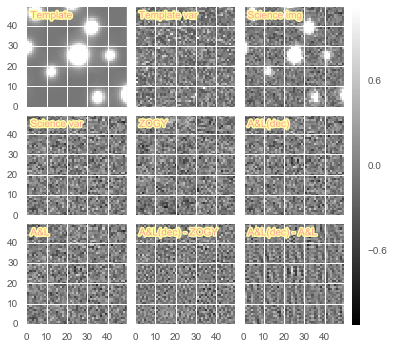

In [2]:
filename = '/Users/dreiss/lsstsw/stack/DarwinX86/afwdata/2.2016.10+7/CFHT/D4/cal-53535-i-797722_6_tmpl.fits'
#psf, source = dit.psf.loadPsf(filename, asArray=False)
filename2 = '/Users/dreiss/lsstsw/stack/DarwinX86/afwdata/2.2016.10+7/CFHT/D4/cal-53535-i-797722_6.fits'
#psf2, source = dit.psf.loadPsf(filename2, asArray=False)

reload(dit)
testObj5a = dit.diffimTests.DiffimTest(n_sources=500, sourceFluxRange=(2000, 20000), 
                         varFlux2=np.linspace(200, 2000, 50), #offset=[0.05, 0.],
                         #varFlux2=np.repeat(500., 50),
                         templateNoNoise=True, skyLimited=True,
                         avoidAllOverlaps=15., psfType=[filename, filename2])

res5 = testObj5a.runTest(returnSources=True)
src5 = res5['sources']
del res5['sources']
print res5

tmp = dit.catalogToDF(testObj5a.getCentroidsCatalog(transientsOnly=False))

testObj5a.doPlot(centroidCoord=[tmp.centroid_y.values[300], tmp.centroid_x.values[300]]);